In [1]:
import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns

from sklearn.model_selection import train_test_split
%matplotlib inline

### **6.2**: 使用libsvm,在西瓜数据集3.0a上分别用线性核和高斯核训练一个svm,并比较其支持向量的差别.  

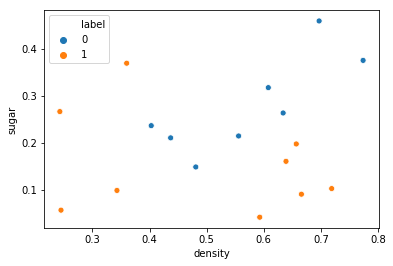

In [2]:
# 西瓜3.0a仅含有标签, 密度和含糖率  
data = pd.read_csv('../data/watermelon3.0.csv')
X = data[['density', 'sugar']]
y = data['label'].values
sns.scatterplot(x='density', y='sugar', hue='label', data=data)
# 先来看看数据, 显然注意到它是线性不可分的

In [3]:
# 为了取得较好效果, 调大惩罚项系数降低经验风险
linearSVModel = sklearn.svm.SVC(kernel='linear', C=5000)
GaussianSVModel = sklearn.svm.SVC(kernel='rbf', C=5000)

linearSVModel.fit(X, y)
GaussianSVModel.fit(X, y)
print('线性SVM支持向量')
print(linearSVModel.support_vectors_)
print('高斯SVM支持向量')
print(GaussianSVModel.support_vectors_)
print('线性SVM预测:', linearSVModel.predict(X))
print('高斯SVM预测:',GaussianSVModel.predict(X))
print('实际标签值为:', y)

线性SVM支持向量
[[0.634 0.264]
 [0.608 0.318]
 [0.556 0.215]
 [0.403 0.237]
 [0.481 0.149]
 [0.437 0.211]
 [0.243 0.267]
 [0.343 0.099]
 [0.639 0.161]
 [0.657 0.198]
 [0.36  0.37 ]
 [0.719 0.103]]
高斯SVM支持向量
[[0.774 0.376]
 [0.403 0.237]
 [0.481 0.149]
 [0.343 0.099]
 [0.657 0.198]
 [0.36  0.37 ]]
线性SVM预测: [0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1]
高斯SVM预测: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
实际标签值为: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]


### **6.3** 选择两个UCI数据集,分别用线性核和高斯核训练一个SVM并与BP神经网络和C4.5决策树进行实验比较  

选择car和audiology数据集, 其中car有7个特征,1728条记录; audiology有71个特征,200条记录.   
之前第5章BP神经网络由于没有做UCI数据集的实验,这里就偷懒不比较了,把决策树的数据直接拿来.  

回顾一下C4.5在audiology数据上的表现

|训练集/测试集acc|Gini指数|信息增益|
|--|--|--|
|不剪枝|1/0.214|0.836/0.205|
|预剪枝|1/0.230|1/0.156|
|后剪枝|1/0.245|1/0.063|  
可以发现不管什么设置都有严重的过拟合, 因为该数据的量太小而类数过多.  

在Car数据集上,C4.5表现就好得多:  

|训练集/测试集acc|Gini指数|信息增益|
|--|--|--|
|不剪枝|0.814/0.790|0.836/0.0.844|
|预剪枝|0.841/0.835|0.839/0.828|
|后剪枝|0.821/0.775|0.831/0.795|     


In [4]:
audata = pd.read_csv('../data/audiology.csv')
cardata = pd.read_csv('../data/car.csv')
datasets = {
            'audiology data': audata,
            'car data': cardata
            }

In [5]:
# 两个数据集x两个模型实验  
linearSVModel = sklearn.svm.SVC(kernel='linear', C=10)
GaussianSVModel = sklearn.svm.SVC(kernel='rbf', C=10)

for name, data in datasets.items():
    print(name, '\n')
    X = data.loc[: , data.columns != 'label']
    y = data['label']
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=16)
    for model in ['linearSVModel', 'GaussianSVModel']:
        
        print('Model:  ', model)
        clf = eval(model)
        clf.fit(X_train, y_train)
        acc_train = np.sum(clf.predict(X_train) == y_train) / len(y_train)
        acc_val = np.sum(clf.predict(X_val) == y_val) / len(y_val)
        print('Acc in training set: ', acc_train)
        print('Acc in val set: ', acc_val, '\n')
    print('\n')


car data 

Model:   linearSVModel
Acc in training set:  0.731548480463097
Acc in val set:  0.7109826589595376 

Model:   GaussianSVModel
Acc in training set:  0.9985528219971056
Acc in val set:  0.9913294797687862 



audiology data 

Model:   linearSVModel
Acc in training set:  1.0
Acc in val set:  0.8 

Model:   GaussianSVModel
Acc in training set:  0.9875
Acc in val set:  0.45 






### **6.8** 以西瓜数据集3.0a的密度为输入,含糖率为输出,试使用LIBSVM训练一个SVR.   
虽然这个单维输入单维输出的问题用SVR做出来不是很好看, 不过还是写一下吧.

In [8]:
data = pd.read_csv('../data/watermelon3.0.csv')
X = data['density'].values.reshape((data.shape[0], 1))
y = data['sugar']

In [9]:
clf = sklearn.svm.SVR()
clf.fit(X, y)
print('RMSE: ', np.sqrt(np.sum(np.square(clf.predict(X) - y))))

RMSE:  0.47086558915157345
